# Imbalance Data

In [1]:
import pandas as pd
import numpy  as np
import seaborn as SB
import matplotlib.pyplot as PLT
import scipy.stats as STATS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn import metrics
import random

In [2]:
n = 50000
skip = sorted(random.sample(range(1,319795),319795-n))
DF = pd.read_csv('../../datasets/heart_2020_cleaned.csv',skiprows=skip).reset_index().rename(columns={'index':'id'})

In [3]:
CatCols = [
    'Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic',
    'PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer'
]
NumCols = [
    'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'
]

X = DF[DF.columns.difference(['id','HeartDisease'])]
Y = DF['HeartDisease']

In [4]:
X.head()

,AgeCategory,AlcoholDrinking,Asthma,BMI,Diabetic,DiffWalking,GenHealth,KidneyDisease,MentalHealth,PhysicalActivity,PhysicalHealth,Race,Sex,SkinCancer,SleepTime,Smoking,Stroke
0,80 or older,No,Yes,31.64,Yes,Yes,Good,No,0.0,No,5.0,White,Female,No,9.0,Yes,No
1,75-79,No,No,28.37,Yes,Yes,Very good,No,0.0,Yes,0.0,White,Male,No,8.0,Yes,No
2,55-59,No,No,24.89,No,No,Very good,No,0.0,Yes,1.0,White,Female,No,7.0,No,No
3,75-79,No,No,27.46,No,No,Poor,No,0.0,Yes,15.0,White,Male,No,8.0,Yes,Yes
4,80 or older,No,No,22.31,No,No,Very good,No,0.0,Yes,0.0,White,Female,Yes,6.0,No,No


# <font color="Brown">BMI :</font>

In [5]:
X['BMI'].describe() 

count    50000.000000
mean        28.334628
std          6.378052
min         12.160000
25%         24.030000
50%         27.320000
75%         31.400000
max         91.550000
Name: BMI, dtype: float64

In [6]:
# normal range 10 ~ 50

In [7]:
X[X['BMI']<=50].groupby(['Sex'])['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,25986.0,27.899513,6.281664,12.48,23.30,26.63,31.32,49.93
Male,23621.0,28.347633,5.357884,12.16,24.54,27.46,31.25,50.00


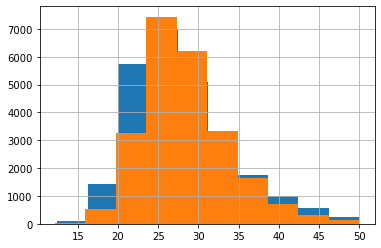

In [8]:
BMI_Normal_Range = X[X['BMI']<=50]
BMI_Normal_Range.groupby(['Sex'])['BMI'].hist()
PLT.show()

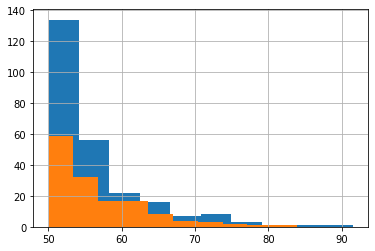

In [9]:
BMI_Out_Of_Range = X[X['BMI']>50]
BMI_Out_Of_Range.groupby(['Sex'])['BMI'].hist()
PLT.show()

In [10]:
# Drop rows with out of rage BMI
X = X.drop(BMI_Out_Of_Range.index,errors='ignore')

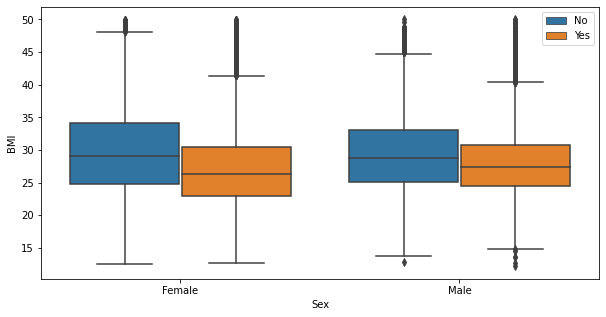

In [11]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['BMI'], hue=X['PhysicalActivity']).legend(loc='upper right')

# <font color="Brown">AlcoholDrinking :</font>

In [12]:
X['AlcoholDrinking'].describe()

count     49607
unique        2
top          No
freq      46214
Name: AlcoholDrinking, dtype: object

In [13]:
X['AlcoholDrinking'].value_counts()

No     46214
Yes     3393
Name: AlcoholDrinking, dtype: int64

# <font color="Brown">AgeCategory :</font>

In [14]:
X['AgeCategory'].describe()

count     49607
unique       13
top       65-69
freq       5291
Name: AgeCategory, dtype: object

In [15]:
X['AgeCategory'].value_counts()

65-69          5291
60-64          5192
70-74          4904
55-59          4681
50-54          3984
80 or older    3753
75-79          3355
45-49          3315
18-24          3290
40-44          3168
35-39          3135
30-34          2843
25-29          2696
Name: AgeCategory, dtype: int64

In [16]:
_1 = X[X['AgeCategory']!='80 or older']['AgeCategory'].str.split('-').apply(
    lambda x : (int(x[0])+int(x[1]))/2
)
_2 = X[X['AgeCategory']=='80 or older']['AgeCategory'].str.split(' or ').apply(
    lambda x : 80
)
X.loc[_1.index,'AgeCategory'] = _1
X.loc[_2.index,'AgeCategory'] = _2
del _1,_2

In [17]:
X['AgeCategory'] = X['AgeCategory'].astype(np.int64) 

In [18]:
X['AgeCategory'].describe()

count    49607.000000
mean        54.423025
std         17.747860
min         21.000000
25%         42.000000
50%         57.000000
75%         67.000000
max         80.000000
Name: AgeCategory, dtype: float64

<AxesSubplot:>

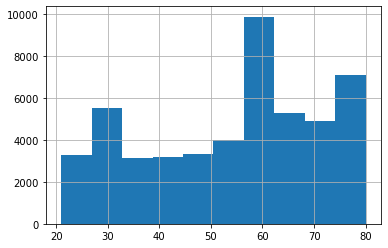

In [19]:
X['AgeCategory'].hist()

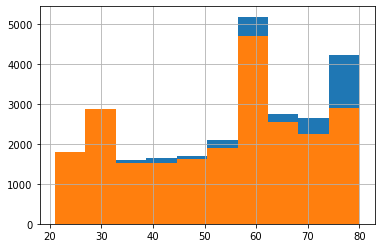

In [20]:
X.groupby(['Sex'])['AgeCategory'].hist()
PLT.show()

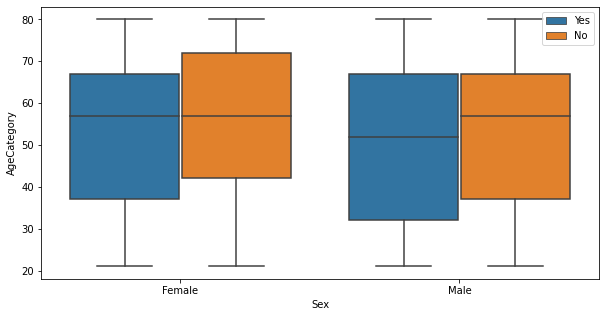

In [21]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['Asthma']).legend(loc='upper right')

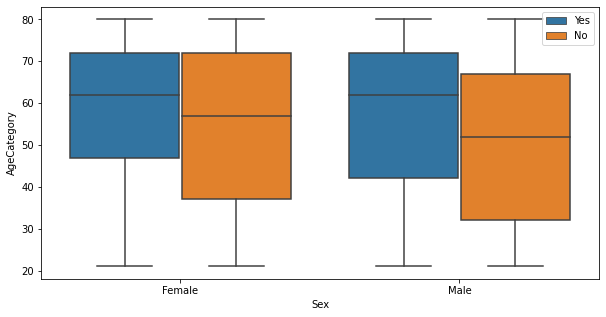

In [22]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['Smoking']).legend(loc='upper right')

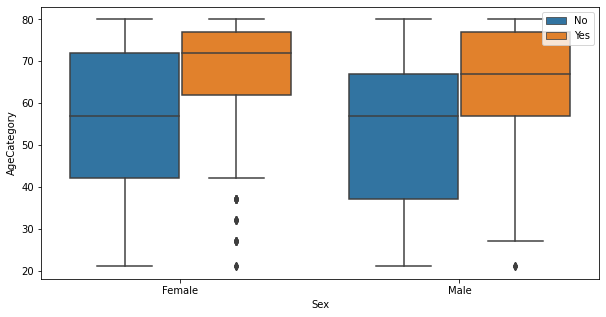

In [23]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['Stroke']).legend(loc='upper right')

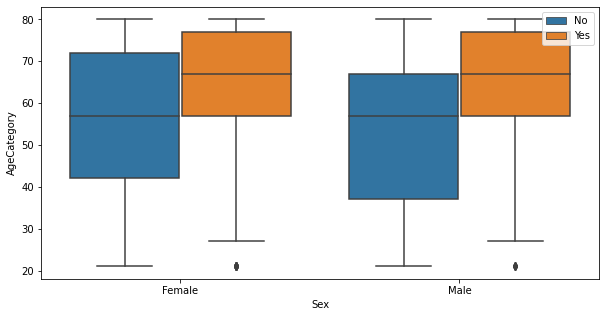

In [24]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['KidneyDisease']).legend(loc='upper right')

# <font color="Brown">Asthma :</font>

In [25]:
DF['Asthma'].value_counts()

No     43391
Yes     6609
Name: Asthma, dtype: int64

In [26]:
DF['Asthma'].describe()

count     50000
unique        2
top          No
freq      43391
Name: Asthma, dtype: object

In [27]:
DF['Asthma'].isnull().sum()

0

# <font color="Brown">Diabetic :</font>

In [28]:
X['Diabetic'].value_counts()

No                         41883
Yes                         6319
No, borderline diabetes     1012
Yes (during pregnancy)       393
Name: Diabetic, dtype: int64

In [29]:
X['Diabetic'].isnull().sum()

0

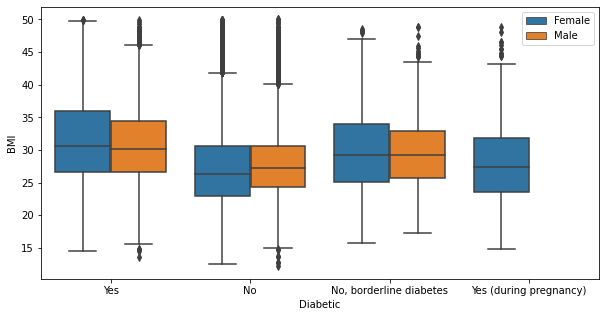

In [32]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Diabetic'],y=X['BMI'], hue=X['Sex']).legend(loc='upper right')